# nmi | 2024 spring
## lecture 08 : bézier curves



### 3.5 bézier curves


first, some links:
</br></br>

* [fast, historic](https://www.youtube.com/watch?v=BThr1pb77Fo);
</br>
* [more mathy](https://www.youtube.com/watch?v=pnYccz1Ha34).
</br>


bézier curves are splines that allow the user to control the slopes at the knots. in return for the extra freedom, the smoothness of the ﬁrst and second derivatives across the knot, which are automatic features of the cubic splines of the previous section, are no longer guaranteed. bézier splines are appropriate for cases where corners (discontinuous first derivatives) and abrupt changes in curvature (discontinuous second derivatives) are occasionally needed.
</br></br>

pierre bézier developed the idea during his work for the renault automobile company. The same idea was discovered independently by paul de casteljau, working for citroen, a rival automobile company. it was top secret back in the day. however, bézier published first and got dibs on the naming. this is used all over design, manufacturing.
</br></br>

each segment of a planar bézier spline is determined by four points $(x_1,y_1), (x_2,y_2), (x_3,y_3), (x_4,y_4)$. the first and last are endpoints and the middle two are control points. the curve leaves $(x_1,y_1)$ along the tangent direction $(x_2-x_1,y_2-y_1)$ and ends at $(x_4,y_4)$ along the tangent direction $(x_4-x_3,y_4-y_3)$. the equations that accomplish this are expressed as a parametric curve $(x(t),y(t))$ for $0\le t\le 1$.
</br>


###### algorithm <b>bézier curve</b>


given endponts $(x_1,y_1),(x_4,y_4)$ and control points $(x_2,y_2),(x_3,y_3)$ set
</br></br>

\begin{align}
  b_x &= 3(x_2 - x_1) \\
  c_x &= 3(x_3 - x_2) - b_x \\
  d_x &= x_4 - x_1 - b_x - c_x \\
  b_y &= 3(y_2 - y_1) \\
  c_y &= 3(y_3 - y_2) - b_y \\
  d_y &= y_4 - y_1 - b_y - c_y.
\end{align}
</br>

the bézier curve is defined by $0\le t\le 1$ by
</br></br>

\begin{align}
  x(t) &= x_1 + b_xt + c_xt^2 + d_xt^3 \\
  y(t) &= y_1 + b_yt + c_yt^2 + d_yt^3.
\end{align}
</br>


continuing example 11,
</br></br>

\begin{align}
  x(0) &= x_1 \\
  x'(0) &= 3(x_2 - x_1) \\
  x(1) &= x_4 \\
  x'(1) &= 3(x_4 - x_3) \\
\end{align}
</br>

and the analogous facts hold for $y(t)$.
</br>


##### example 15


find bézier curve $(x(t),y(t))$ through points $(x,y)=(1,1),(2,2)$ with control points $(1,3),(3,3)$.
</br>


###### answer


\begin{align}
  x(t) &= 1 + 6t^2 - 5t^3 \\
  y(t) &= 1 + 6t - 6t^2 + t^3
\end{align}
</br>


###### code


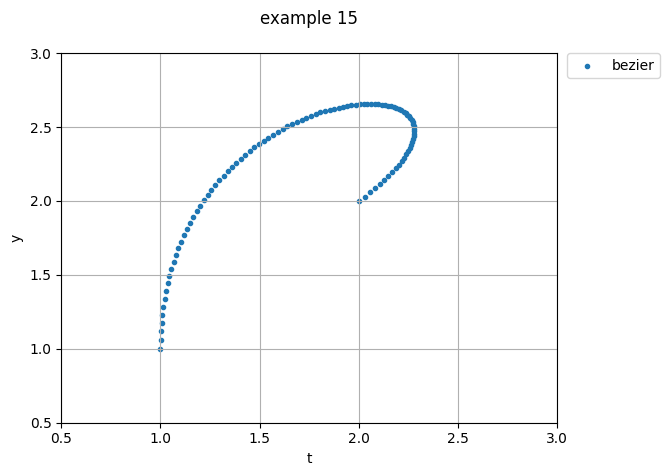

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def main():
  x = lambda t: 1 + 6*pow(t,2) - 5*pow(t,3)
  y = lambda t: 1 + 6*t - 6*pow(t,2) + pow(t,3)

  h = 0.01
  imax = int(1/h)+1
  data = np.zeros((imax,2))
  for i in range(imax):
    t = i*h
    data[i,0] = x(t)
    data[i,1] = y(t)

  # plot, set data
  plt.scatter(data[:,0],data[:,1],c="C0",marker=".",label="bezier")

  # plot, set style
  plt.grid()
  plt.title("example 15\n")
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.ylabel("y")
  plt.xlabel("t")
  plt.xlim(0.5,3)
  plt.ylim(0.5,3)

  # plot, show
  plt.show()

if __name__ == "__main__":
  main()
